<a href="https://colab.research.google.com/github/singhbipin2117/travel-insurance/blob/master/hackethon_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# loading packages

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
# loading csv files

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_test_new = df_test.copy()

In [0]:
#list of columns
df_train.columns.to_list()

['ID',
 'Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Claim',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Gender',
 'Age']

In [0]:
#droppinf ID column
df_train.drop(["ID"],1,inplace=True)

In [0]:
#printing column names
df_train.columns.to_list()

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Claim',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Gender',
 'Age']

In [0]:
#getting target variable in Y variable
y_train = df_train[["Claim"]]

In [0]:
#dropping Claim column from input features
df_train.drop(["Claim"],1,inplace=True)

In [0]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Number of Claim')

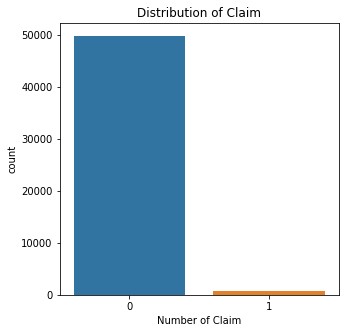

In [0]:
#plot count plot of Claim variable
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Claim", data=y_train)
plt.title('Distribution of Claim')
plt.xlabel('Number of Claim')

In [0]:
# bylooking count plot we can see that there is clss imbalance in dataset

In [0]:
# train data size
df_train.shape

(50553, 10)

In [0]:
#dataypes
df_train.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [0]:
# types of datatypes
set(df_train.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [0]:
# distributing int flot and Object columns
df_train_int = df_train.select_dtypes(include = ['int64', 'float64'])
df_train_Object = df_train.select_dtypes(include = object)

In [0]:
#columns
df_train_int.columns.tolist()

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [0]:
# there are only 4 np.Number column

In [0]:
# chaecking null values for int column
df_train_int.isnull().sum()

Duration                0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [0]:
#there are no null vlaues in null columns
df_train_int['Claim'] = y_train

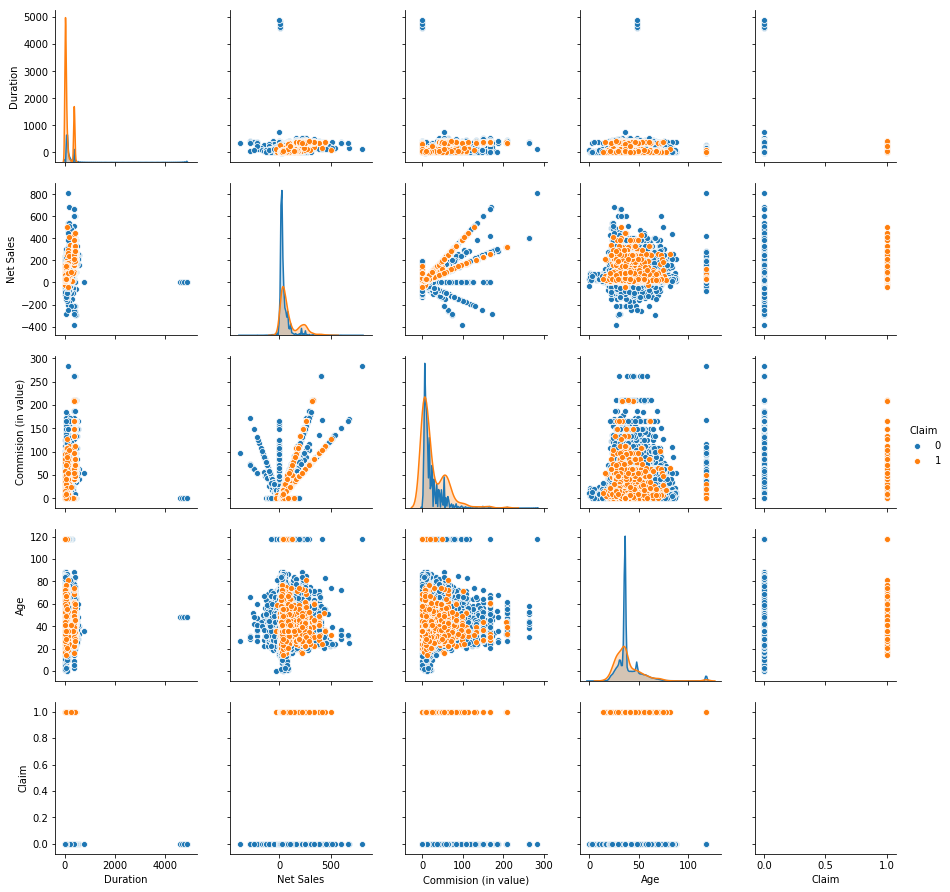

In [0]:
sns.pairplot(df_train_int, hue="Claim")

Observations from pair plot wrt claim column <br>
1) for All values of duration above ~ 800 all claims are rejected<br>
2) for net sales value less than ~ 0 all claims are rejected<br>
3) for age less than ~ 10 all claims are rejected<br>
4) for Commission (in value) less than ~ 0 all claims are rejected and above ~220 all claims are rejected<br>

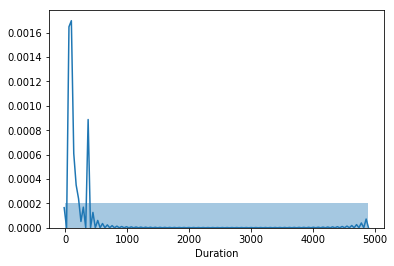

In [0]:
# histogram for distribution plot
sns.distplot(df_train_int["Duration"], bins=1)

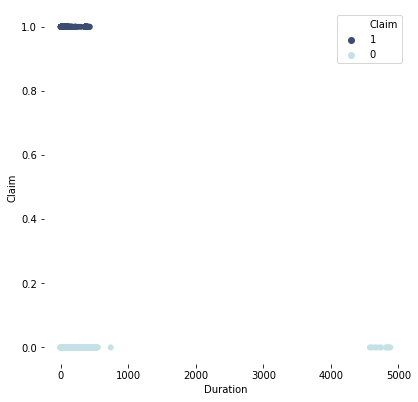

In [0]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Duration", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [0]:
# all claims above ~800 rejected
df_train_int.loc[df_train_int["Duration"] >= 740, ['Duration']] = 740

In [0]:
# duration is time period thats why it can not be negative
df_train_int.loc[df_train_int["Duration"] <= 0, ['Duration']] = 0

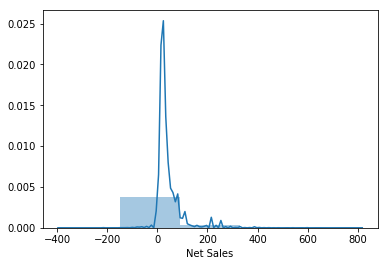

In [0]:
# histogram for net sales plot
sns.distplot(df_train_int["Net Sales"], bins=5)

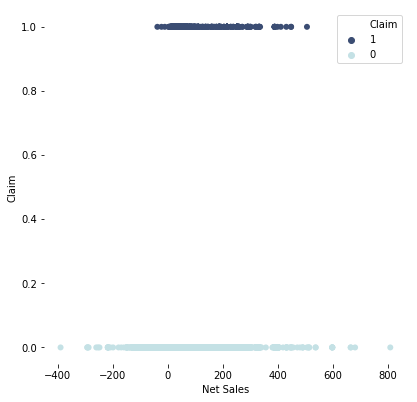

In [0]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Net Sales", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [0]:
# for all the values below ~-20 all the claims are rejected
df_train_int.loc[df_train_int["Net Sales"] <= -20, ['Net Sales']] = -20

In [0]:
# for all the values above ~550 all the claims are rejected
df_train_int.loc[df_train_int["Net Sales"] >= 550, ['Net Sales']] = 550

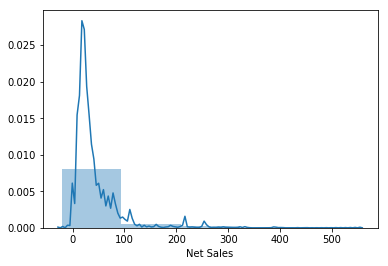

In [0]:
# histogram for net sales plot
sns.distplot(df_train_int["Net Sales"], bins=5)

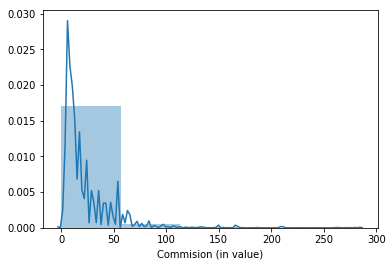

In [0]:
# histogram for net sales plot
sns.distplot(df_train_int["Commision (in value)"], bins=5)

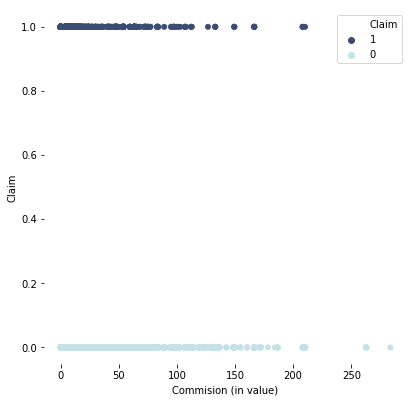

In [0]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Commision (in value)", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [0]:
# for all Commision above ~220 all the claims are rejeted
df_train_int.loc[df_train_int["Commision (in value)"] >= 220, ['Commision (in value)']] = 220

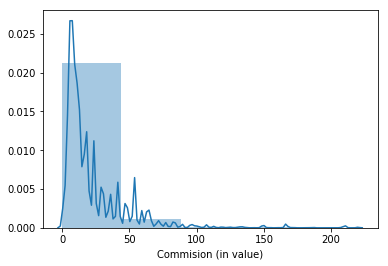

In [0]:
# histogram for net sales plot
sns.distplot(df_train_int["Commision (in value)"], bins=5)

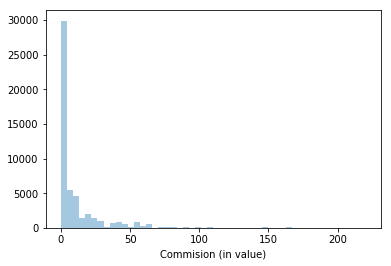

In [0]:
ax = sns.distplot(df_train_int["Commision (in value)"],kde = False)

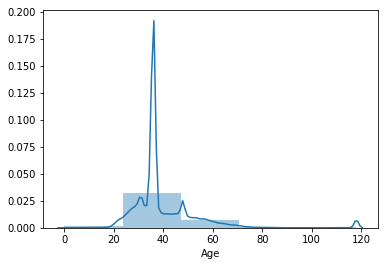

In [0]:
# histogram for net sales plot
sns.distplot(df_train_int["Age"], bins=5)

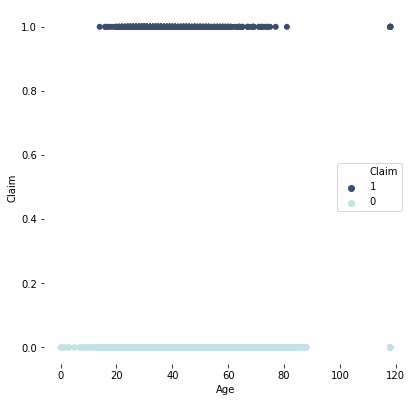

In [0]:
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
claim_ranking = [1,0]
sns.scatterplot(x="Age", y="Claim",
                hue="Claim",
                palette="ch:r=-.2,d=.3_r",
                hue_order=claim_ranking,
                sizes=(1, 3), linewidth=0,
                data=df_train_int, ax=ax)

In [0]:
# age below less than ~15 all claims are rejected
df_train_int.loc[df_train_int["Age"] <= 15, ['Age']] = 15

In [0]:
# age below less than ~15 all claims are rejected
df_train_int.loc[df_train_int["Age"] >= 85, ['Age']] = 85

In [0]:
# eda for int variable is over

In [0]:
# eda for categorical variable
df_train_Object['Claim'] = y_train

In [0]:
# check for null values
df_train_Object.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Destination                 0
Gender                  35953
Claim                       0
dtype: int64

In [0]:
# only gender column has null values

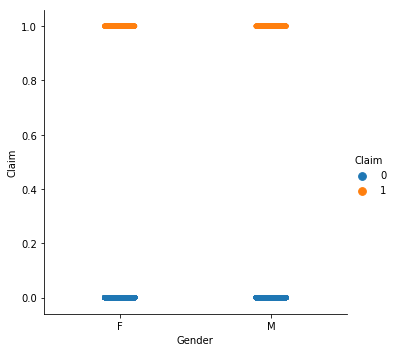

In [0]:
#cat plot
sns.catplot(x="Gender", y="Claim", hue="Claim", data=df_train_Object);

In [0]:
# perccenttage of missing data for gender
df_train_Object["Gender"].isnull().sum()/(df_train_Object["Gender"].count() + df_train_Object["Gender"].isnull().sum())

0.7111941922338931

In [0]:
# 71 % data is missing in fender column
# since its categorical column lets remove it with mode value
df_train_Object["Gender"].fillna(df_train_Object["Gender"].mode()[0], inplace=True)

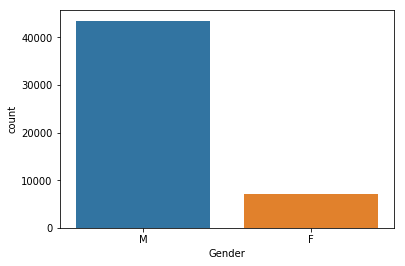

In [0]:
# count plot for Gender
sns.countplot(data = df_train_Object, x = 'Gender')

In [0]:
sns.set(rc={'figure.figsize':(10.7,10.27)})

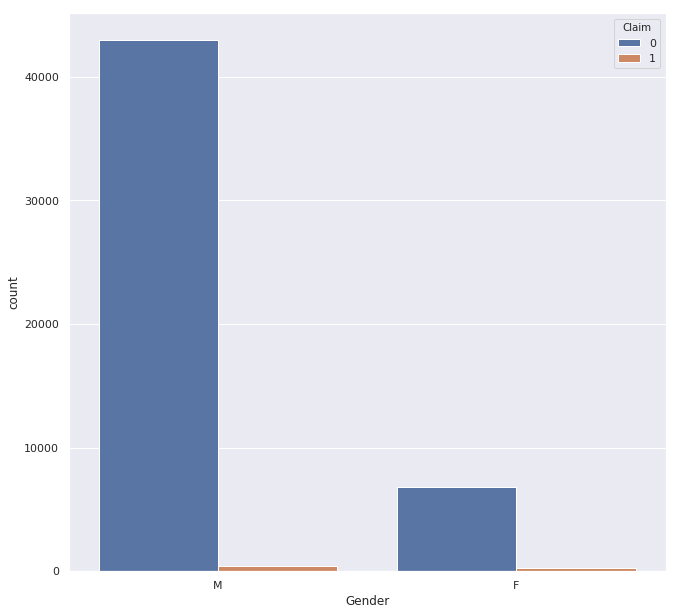

In [0]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Gender', hue='Claim')

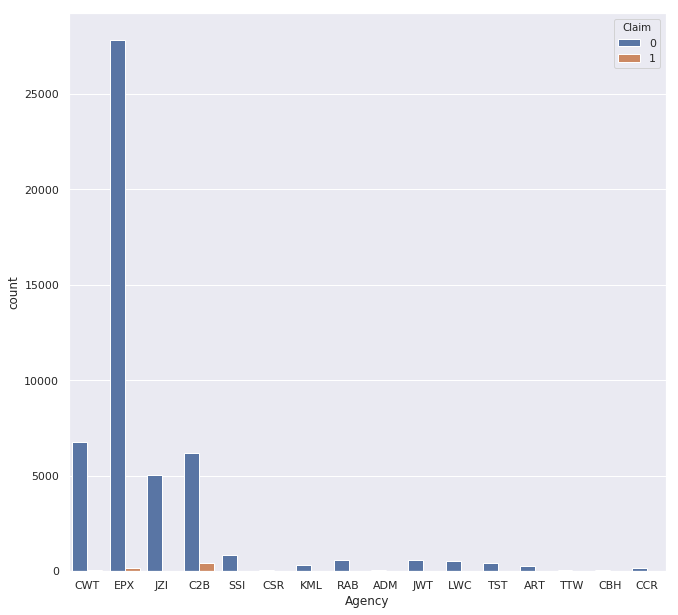

In [0]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Agency', hue='Claim')

In [0]:
# from above plot we can conclude that agency is not related with claim

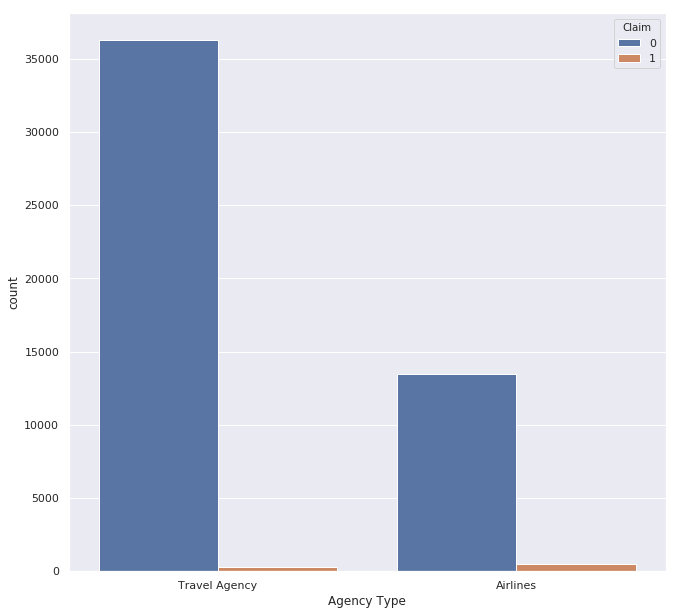

In [0]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Agency Type', hue='Claim')

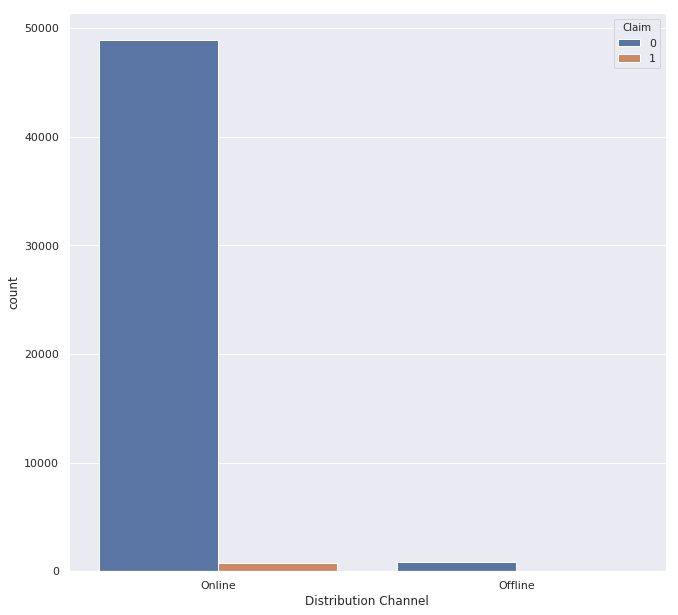

In [0]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Distribution Channel', hue='Claim')

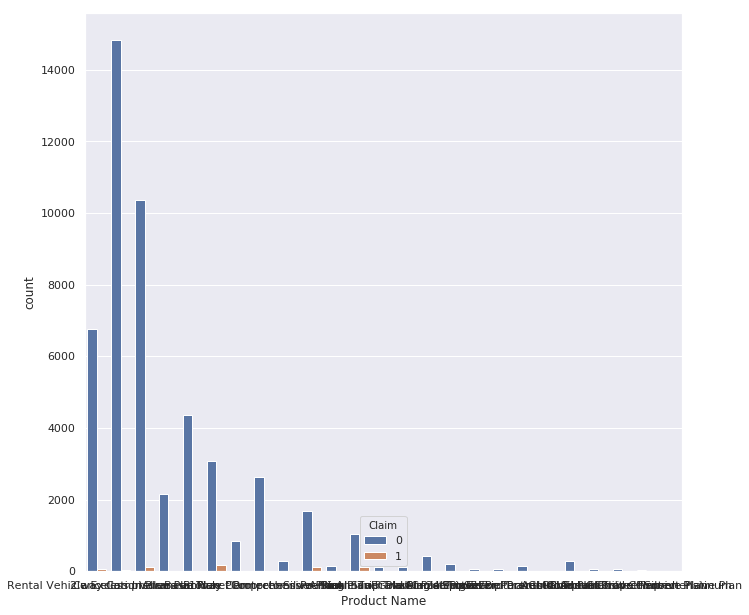

In [0]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Product Name', hue='Claim')

In [0]:
# claim is also not dependent on Product Name

In [0]:
sns.set(rc={'figure.figsize':(20.7,20.27)})

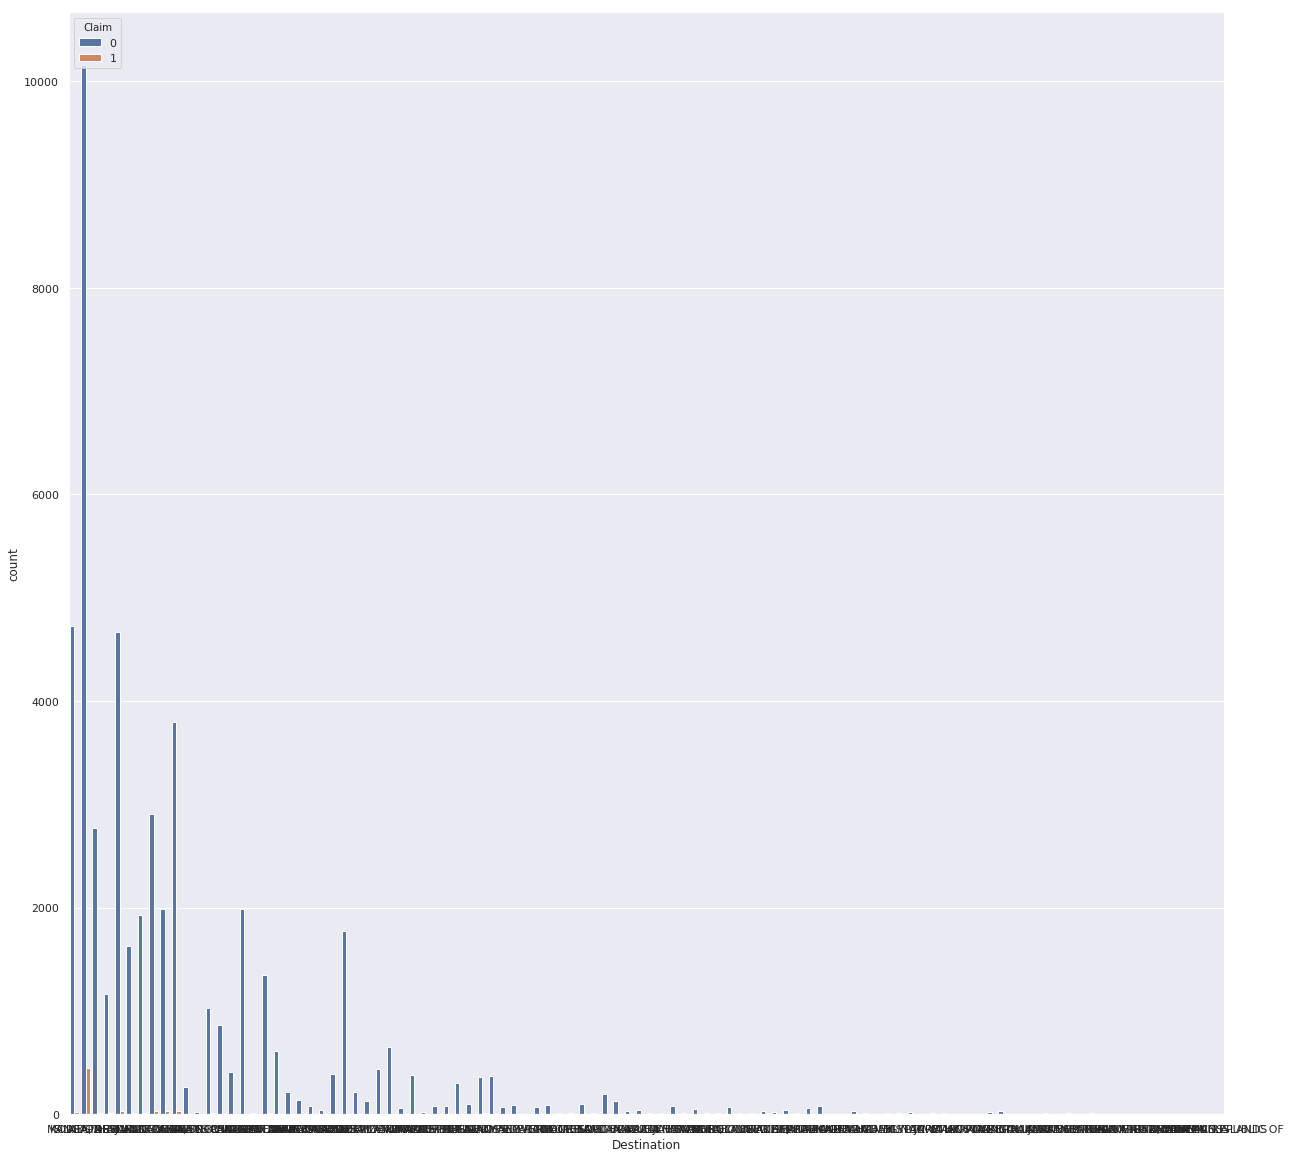

In [0]:
# count plot in between gender and claim
sns.countplot(data = df_train_Object, x='Destination', hue='Claim')

In [0]:
# claim is also not dependent on the Destination

In [0]:
df_object_remove = ["Destination", "Product Name", "Agency","Distribution Channel", "Gender", "Agency Type"]
df_train_Object.drop(df_object_remove,1,inplace=True)

In [0]:
df_train_Object.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
df_train_Object.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [0]:
#install imbalance
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 9.9MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
from imblearn.combine import SMOTEENN

Using TensorFlow backend.


In [0]:
sm = SMOTEENN(random_state=42)

In [0]:
df_train_new = df_train_int

In [0]:
df_train_new.head()

,Duration,Net Sales,Commision (in value),Age,Claim
0,7,0.0,17.82,31,0
1,85,69.0,0.00,36,0
2,11,19.8,11.88,75,0
3,16,20.0,0.00,32,0
4,10,15.0,0.00,29,0


In [0]:
df_train_new.iloc[:,0:4] = scaler.fit_transform(df_train_new.iloc[:,0:4])

In [0]:
df_train_new.head()

,Duration,Net Sales,Commision (in value),Age,Claim
0,-0.555972,-0.863377,0.403211,-0.735256,0
1,0.487630,0.582230,-0.496074,-0.302683,0
2,-0.502454,-0.448551,0.103449,3.071381,0
3,-0.435556,-0.444361,-0.496074,-0.648741,0
4,-0.515833,-0.549115,-0.496074,-0.908285,0


In [0]:
df_train_without_claim = df_train_new.drop(['Claim'],1)

In [0]:
df_train_without_claim.head()

,Duration,Net Sales,Commision (in value),Age
0,-0.555972,-0.863377,0.403211,-0.735256
1,0.487630,0.582230,-0.496074,-0.302683
2,-0.502454,-0.448551,0.103449,3.071381
3,-0.435556,-0.444361,-0.496074,-0.648741
4,-0.515833,-0.549115,-0.496074,-0.908285


In [0]:
X_res, y_res = sm.fit_resample(df_train_without_claim, y_train)

In [0]:
len(X_res)

87517

In [0]:
#handling test data
df_test.columns.tolist()

['ID',
 'Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Gender',
 'Age']

In [0]:
#drop ID
df_test.drop(["ID"],1, inplace=True)

In [0]:
# all claims above ~800 rejected
df_test.loc[df_test["Duration"] >= 740, ['Duration']] = 740
df_test.loc[df_test["Duration"] <= 0, ['Duration']] = 0

In [0]:
# for all the values below ~-20 all the claims are rejected
df_test.loc[df_test["Net Sales"] <= -20, ['Net Sales']] = -20
df_test.loc[df_test["Net Sales"] >= 550, ['Net Sales']] = 550

In [0]:
# for all Commision above ~220 all the claims are rejeted
df_test.loc[df_test["Commision (in value)"] >= 220, ['Commision (in value)']] = 220

In [0]:
# age below less than ~15 all claims are rejected
df_test.loc[df_test["Age"] <= 15, ['Age']] = 15
df_test.loc[df_test["Age"] >= 85, ['Age']] = 85

In [0]:
# 71 % data is missing in fender column
# since its categorical column lets remove it with mode value
df_test["Gender"].fillna(df_test["Gender"].mode()[0], inplace=True)

In [0]:
# for all Commision above ~220 all the claims are rejeted
df_test.loc[df_test["Commision (in value)"] <= 0, ['Commision (in value)']] = 0

In [0]:
df_object_remove = ["Destination", "Product Name", "Agency","Distribution Channel", "Gender", "Agency Type"]
df_test.drop(df_object_remove,1,inplace=True)

In [0]:
df_test.head()

,Duration,Net Sales,Commision (in value),Age
0,58,49.5,29.7,47
1,4,20.0,0.0,24
2,68,20.0,0.0,36
3,41,28.0,0.0,36
4,16,11.0,0.0,36


In [0]:
df_test.iloc[:,:] = scaler.fit_transform(df_test.iloc[:,:])

In [0]:
df_test.head()

,Duration,Net Sales,Commision (in value),Age
0,0.136226,0.186813,1.030038,0.673813
1,-0.596287,-0.438300,-0.500852,-1.348369
2,0.271877,-0.438300,-0.500852,-0.293318
3,-0.094380,-0.268778,-0.500852,-0.293318
4,-0.433507,-0.629012,-0.500852,-0.293318


In [0]:
df_test.head()

,Duration,Net Sales,Commision (in value),Age
0,0.136226,0.186813,1.030038,0.673813
1,-0.596287,-0.438300,-0.500852,-1.348369
2,0.271877,-0.438300,-0.500852,-0.293318
3,-0.094380,-0.268778,-0.500852,-0.293318
4,-0.433507,-0.629012,-0.500852,-0.293318


In [0]:
# apply machine learning algorithms

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
X_train, X_test, y_train, y_test = tts(X_res, y_res, test_size=0.33, random_state=42)

In [0]:
# apply grid search cv
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.967937398289533
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     14177
           1       0.96      0.98      0.97     14704

    accuracy                           0.97     28881
   macro avg       0.97      0.97      0.97     28881
weighted avg       0.97      0.97      0.97     28881

0.9676587425931578


In [0]:
# predicting testing data
y_pred = knn.predict(df_test)

In [0]:
generatecsv("sample_submission_knn",y_pred)

In [0]:
# apply grid search cv
knn = KNeighborsClassifier()
param = {"n_neighbors":np.arange(1,30,1)}
knn_cv = GridSearchCV(estimator=knn, param_grid=param, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.best_estimator_.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9940445275440601
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14177
           1       0.99      1.00      0.99     14704

    accuracy                           0.99     28881
   macro avg       0.99      0.99      0.99     28881
weighted avg       0.99      0.99      0.99     28881

0.994004622730667


In [0]:
# predicting testing data
y_pred = knn_cv.best_estimator_.predict(df_test)

In [0]:
generatecsv("sample_submission_knn_cv",y_pred)

In [0]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)

In [0]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))
print (rfc.oob_score_)

0.9846265711021086
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14177
           1       0.98      0.98      0.98     14704

    accuracy                           0.98     28881
   macro avg       0.98      0.98      0.98     28881
weighted avg       0.98      0.98      0.98     28881

0.9846214506047167
0.9719626168224299


In [0]:
df_test.head()

,Duration,Net Sales,Commision (in value),Age
0,0.136226,0.186813,1.030038,0.673813
1,-0.596287,-0.438300,-0.500852,-1.348369
2,0.271877,-0.438300,-0.500852,-0.293318
3,-0.094380,-0.268778,-0.500852,-0.293318
4,-0.433507,-0.629012,-0.500852,-0.293318


In [0]:
# predicting testing data
y_pred = rfc.predict(df_test)

In [0]:
generatecsv("sample_submission_random",y_pred)

In [0]:
def generatecsv(filename,y_pred):
    y_pred_df = pd.DataFrame(y_pred,columns=['Claim'])
    y_pred_df['Claim'] = y_pred_df['Claim'].astype(int)
    random_csv_df = pd.concat([df_test_new['ID'], y_pred_df],1)
    random_csv_df.to_csv(filename+'.csv', index=False)

In [0]:
#Model 1: Logistic Regression without hyperparameter and class weights in not balanced

In [0]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)
y_pred  = log_reg.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.6839098369170042
              precision    recall  f1-score   support

           0       0.64      0.82      0.72     14177
           1       0.76      0.56      0.64     14704

    accuracy                           0.68     28881
   macro avg       0.70      0.69      0.68     28881
weighted avg       0.70      0.68      0.68     28881

0.6862725932622558


In [0]:
# predicting testing data
y_pred = log_reg.predict(df_test)
generatecsv("sample_submission_log_reg",y_pred)

In [0]:
#Model 2: Logistic Regression without hyperparameter and class weights balanced

In [0]:
log_reg = LogisticRegression(random_state=42, class_weight="balanced")
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)
y_pred  = log_reg.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.682040095564558
              precision    recall  f1-score   support

           0       0.64      0.83      0.72     14177
           1       0.76      0.54      0.63     14704

    accuracy                           0.68     28881
   macro avg       0.70      0.68      0.68     28881
weighted avg       0.70      0.68      0.68     28881

0.6846209080509642


In [0]:
# predicting testing data
y_pred = log_reg.predict(df_test)
generatecsv("sample_submission_log_reg_balaced",y_pred)

In [0]:
#Model 3: Logistic Regression with hyperparameters optimized and class weights balanced

In [0]:
params = {"C":np.arange(0.01,5,0.1), 
         "penalty":["l2", "l1"]}
log_reg_cv = GridSearchCV(log_reg, param_grid=params, cv = 10)
log_reg_cv.fit(X_train,y_train)
y_pred = log_reg_cv.best_estimator_.predict(X_test)
print (log_reg_cv.best_params_)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

{'C': 0.21000000000000002, 'penalty': 'l1'}
0.6819015962051176
              precision    recall  f1-score   support

           0       0.64      0.83      0.72     14177
           1       0.76      0.54      0.63     14704

    accuracy                           0.68     28881
   macro avg       0.70      0.68      0.68     28881
weighted avg       0.70      0.68      0.68     28881

0.6844823625609167


In [0]:
# predicting testing data
y_pred = log_reg_cv.predict(df_test)
generatecsv("sample_submission_log_reg_cv",y_pred)

In [0]:
#Model 4: Decision tree with hyperparameters optimized and class weights balanced

In [0]:
dtc = DecisionTreeClassifier(random_state=42)
params = {"criterion":["gini", "entropy"], 
         "max_depth":np.arange(4,20,1), 
         "min_samples_split":np.arange(2, 6, 2)}
dtc_cv = GridSearchCV(dtc, param_grid=params, cv = 5)
dtc_cv.fit(X_train,y_train)
y_pred = dtc_cv.best_estimator_.predict(X_test)
print (dtc_cv.best_params_)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

{'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 2}
0.9750354904608566
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14177
           1       0.98      0.97      0.98     14704

    accuracy                           0.98     28881
   macro avg       0.97      0.98      0.98     28881
weighted avg       0.98      0.98      0.98     28881

0.9750985936738098


In [0]:
# predicting testing data
y_pred = dtc_cv.best_estimator_.predict(df_test)
generatecsv("sample_submission_dtc_cv_v1",y_pred)
# test accuracy 0.69

In [0]:
dtc_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=29,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
#Model 5: Random Forest with no hyperparameter optmized

In [0]:
rfc = RandomForestClassifier(random_state=42, oob_score=True,max_depth=10,min_samples_split=4)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))
print (rfc.oob_score_)

0.9034659464699976
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     14177
           1       0.90      0.91      0.91     14704

    accuracy                           0.90     28881
   macro avg       0.90      0.90      0.90     28881
weighted avg       0.90      0.90      0.90     28881

0.9033124456055085
0.8944334538508766


In [0]:
# predicting testing data
y_pred = rfc.predict(df_test)
generatecsv("sample_submission_rfc",y_pred)

In [0]:
#Model 5: Random Forest with no hyperparameter optmized

In [0]:
rfc = RandomForestClassifier(random_state=42, oob_score=True,min_samples_split=4)
params = {"criterion":["gini", "entropy"],"max_depth":np.arange(4,11,1)}
rfc_cv = GridSearchCV(rfc, param_grid=params, cv = 10)
rfc_cv.fit(X_train,y_train)
y_pred = rfc_cv.best_estimator_.predict(X_test)
print (rfc_cv.best_params_)
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

{'criterion': 'gini', 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     14177
           1       0.90      0.91      0.91     14704

    accuracy                           0.90     28881
   macro avg       0.90      0.90      0.90     28881
weighted avg       0.90      0.90      0.90     28881

0.9033124456055085


In [0]:
# predicting testing data
y_pred = rfc_cv.best_estimator_.predict(df_test)
generatecsv("sample_submission_rfc_cv",y_pred)
# test accuracy 0.74

In [0]:
rfc_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
#Model 6 Adaboost with Decision tree

In [0]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
adb = AdaBoostClassifier()
gdb = GradientBoostingClassifier()

In [0]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_leaf=4)
adb = AdaBoostClassifier(base_estimator=dtc, n_estimators=50,random_state=42,learning_rate=0.5)

adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9920362868321734
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14177
           1       0.99      0.99      0.99     14704

    accuracy                           0.99     28881
   macro avg       0.99      0.99      0.99     28881
weighted avg       0.99      0.99      0.99     28881

0.9920386904819014


In [0]:
# predicting testing data
y_pred = adb.predict(df_test)
generatecsv("sample_submission_adb_v1",y_pred)
#test accuracy 0.76

In [0]:
# adaboost default
adb = AdaBoostClassifier(n_estimators=50,random_state=42,learning_rate=0.3)

adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.8014611682420969
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     14177
           1       0.79      0.83      0.81     14704

    accuracy                           0.80     28881
   macro avg       0.80      0.80      0.80     28881
weighted avg       0.80      0.80      0.80     28881

0.8010170920838156


In [0]:
# predicting testing data
y_pred = adb.predict(df_test)
generatecsv("sample_submission_adb_v5",y_pred)
#test accuracy 0.75

In [0]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
adb = AdaBoostClassifier(base_estimator=rfc,n_estimators=20,random_state=42,learning_rate=0.9)

adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9889893009244832
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14177
           1       0.99      0.99      0.99     14704

    accuracy                           0.99     28881
   macro avg       0.99      0.99      0.99     28881
weighted avg       0.99      0.99      0.99     28881

0.9889767852618493


In [0]:
# predicting testing data
y_pred = adb.predict(df_test)
generatecsv("sample_submission_adb_v12",y_pred)
#test accuracy 0.86

In [0]:
# adaboost default
gdb = GradientBoostingClassifier(learning_rate=0.5,n_estimators=100,min_samples_split=4)
gdb.fit(X_train,y_train)
y_pred = gdb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9440462587860531
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14177
           1       0.94      0.95      0.95     14704

    accuracy                           0.94     28881
   macro avg       0.94      0.94      0.94     28881
weighted avg       0.94      0.94      0.94     28881

0.9440225658611324


In [0]:
# predicting testing data
y_pred = gdb.predict(df_test)
generatecsv("sample_submission_gdb_v2",y_pred)
#test accuracy 0.92

In [0]:
# adaboost default
gdb = GradientBoostingClassifier(learning_rate=0.7,n_estimators=150,min_samples_split=4)
gdb.fit(X_train,y_train)
y_pred = gdb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9756587375783387
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14177
           1       0.98      0.97      0.98     14704

    accuracy                           0.98     28881
   macro avg       0.98      0.98      0.98     28881
weighted avg       0.98      0.98      0.98     28881

0.9756828631418282


In [0]:
# predicting testing data
y_pred = gdb.predict(df_test)
generatecsv("sample_submission_gdb_v3",y_pred)
#test accuracy 0.95

In [0]:
# adaboost default
gdb = GradientBoostingClassifier(learning_rate=0.7,n_estimators=150,min_samples_split=6)
gdb.fit(X_train,y_train)
y_pred = gdb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9752432395000173
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14177
           1       0.98      0.97      0.98     14704

    accuracy                           0.98     28881
   macro avg       0.98      0.98      0.98     28881
weighted avg       0.98      0.98      0.98     28881

0.9752710187914139


In [0]:
# predicting testing data
y_pred = gdb.predict(df_test)
generatecsv("sample_submission_gdb_v4",y_pred)
#test accuracy 0.96

In [0]:
# adaboost default
gdb = GradientBoostingClassifier(learning_rate=0.7,n_estimators=150,min_samples_split=10)
gdb.fit(X_train,y_train)
y_pred = gdb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9768359821335826
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14177
           1       0.98      0.98      0.98     14704

    accuracy                           0.98     28881
   macro avg       0.98      0.98      0.98     28881
weighted avg       0.98      0.98      0.98     28881

0.9768604998072328


In [0]:
# predicting testing data
y_pred = gdb.predict(df_test)
generatecsv("sample_submission_gdb_v6",y_pred)
#test accuracy 0.97

In [0]:
# adaboost default
gdb = GradientBoostingClassifier(learning_rate=0.9,n_estimators=150,min_samples_split=10)
gdb.fit(X_train,y_train)
y_pred = gdb.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9781171012084069
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14177
           1       0.98      0.98      0.98     14704

    accuracy                           0.98     28881
   macro avg       0.98      0.98      0.98     28881
weighted avg       0.98      0.98      0.98     28881

0.9781237170114846


In [0]:
# predicting testing data
y_pred = gdb.predict(df_test)
generatecsv("sample_submission_gdb_v4",y_pred)
#test accuracy 0.97

In [0]:
gdb = GradientBoostingClassifier()
params = {"learning_rate":np.arange(0.1, 0.8, 0.1),"n_estimators":[150],"min_samples_split":np.arange(2, 12, 2)}
gdb_cv = GridSearchCV(gdb, param_grid=params, cv = 5)
gdb_cv.fit(X_train,y_train)
y_pred = gdb_cv.best_estimator_.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

0.9624666735916346
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14177
           1       0.96      0.96      0.96     14704

    accuracy                           0.96     28881
   macro avg       0.96      0.96      0.96     28881
weighted avg       0.96      0.96      0.96     28881

0.9624529081571915


In [0]:
 # predicting testing data
y_pred = gdb_cv.best_estimator_.predict(df_test)
generatecsv("sample_submission_gdb_v2",y_pred)
#test accuracy 0.96

In [0]:
gdb_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.7000000000000001, loss='deviance',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)